In [1]:
from functions_for_TAQR import *
from multimodel_quantile_loss_network_working_TDS_article_functions import one_step_quantile_prediction

# Load the data

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]

In [2]:

def run_taqr(corrected_ensembles, actuals, quantiles, n_init, n_full):
    # Clean for NaNs
    actuals[np.isnan(actuals)] = 0

    y_pred_list = []
    y_actual_list = []

    for q in quantiles:
        print("running TAQR for quantile: ", q)
        y_pred, y_actual, _ = one_step_quantile_prediction(corrected_ensembles, actuals, n_init=n_init, n_full=n_full, quantile=q, already_correct_size = True)
        y_pred_list.append(y_pred)
        y_actual_list.append(y_actual)

    return y_pred_list, y_actual_list

In [3]:
y_pred, y_actual = run_taqr(ensembles_DK2_onshorewindpower, Y_DK2_OnshoreWindPower, [0.05, 0.5, 0.95], 100, 200)

running TAQR for quantile:  0.05


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.95


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


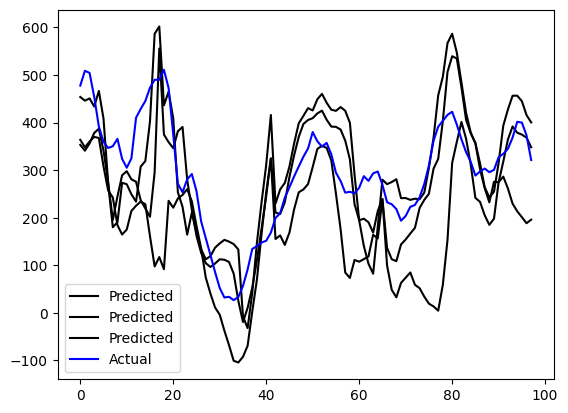

98


In [4]:
import matplotlib.pyplot as plt

plt.plot(np.array(y_pred).T, color = "black", label = "Predicted")
plt.plot(y_actual[1], color = "blue",   label = "Actual")
plt.legend()
plt.show()

print(len(y_pred[1]))

In [5]:
from pipeline_start_to_finish import calculate_crps, calculate_qss, calculate_variogram_score

print("CRPS: ", calculate_crps(y_pred[1], y_actual[1]))
print("Variogram: ", calculate_variogram_score(np.array(y_pred), y_actual[1]))

print("QSS: ", np.mean(calculate_qss( y_actual[1], y_pred, [0.05, 0.5, 0.95])))

CRPS:  70.61639512088198
Variogram:  802.7335562652553
QSS:  1.7067567365963516


We will now try to fit an AR(1) SDE to the actuals data, simulate ensembles from this, and see if it is better for the Variogram score!!!

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'extensys',
 'extensys-gd',
 'extensys-ms',
 'extensys-nb',
 'extensys-pl',
 'extensys-sc',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']